In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
%matplotlib notebook

In [187]:
gppd_updated = pd.read_csv('gppd_updated_with_generation_estimations.csv',index_col=0)

In [12]:
gppd_updated['generation_gwh_2017'].notnull().sum()

9213

In [13]:
gppd_updated['ai4e_estimated_generation_2017'].notnull().sum()

12265

In [196]:
for year in range(2013,2018):
    gppd_updated.loc[(gppd_updated['generation_gwh_{}'.format(str(year))].isnull()) & 
                     (gppd_updated['ai4e_estimated_generation_{}'.format(str(year))].notnull()),'ai4e_{}_incremented'.format(str(year))] = 1

In [128]:
analysis_by_year = pd.DataFrame(columns=[str(year) for year in range(2013,2018)])
analysis_by_year.loc['total',:] = gppd_updated.shape[0]

for year in range(2013,2018):
#     analysis_by_year.loc['total',:] = gppd_updated[gppd_updated['commissioning_year'] <= year].shape[0]
    analysis_by_year.loc['reported',str(year)] = gppd_updated[gppd_updated['generation_gwh_{}'.format(str(year))].notnull()].shape[0]
    analysis_by_year.loc['ai4e_estimated',str(year)] = gppd_updated['ai4e_{}_incremented'.format(str(year))].sum()

In [129]:
analysis_by_year = analysis_by_year.T

In [130]:
analysis_by_year

,total,reported,ai4e_estimated
2013,30126.0,6996.0,6308.0
2014,30126.0,7440.0,6657.0
2015,30126.0,8161.0,6742.0
2016,30126.0,9572.0,6605.0
2017,30126.0,9213.0,7134.0


In [157]:
gppd_updated.columns

Index(['Unnamed: 0', 'capacity_mw', 'commissioning_year', 'country',
       'country_long', 'estimated_generation_gwh', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'geolocation_source', 'gppd_idnr', 'latitude',
       'longitude', 'name', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'owner', 'primary_fuel', 'source', 'url', 'wepp_id',
       'year_of_capacity_data', 'LOCATIONID', 'UTYPE',
       'ai4e_estimated_generation_2013', 'ai4e_estimated_generation_2014',
       'ai4e_estimated_generation_2015', 'ai4e_estimated_generation_2016',
       'ai4e_estimated_generation_2017', 'ai4e_2013_incremented',
       'ai4e_2014_incremented', 'ai4e_2015_incremented',
       'ai4e_2016_incremented', 'ai4e_2017_incremented'],
      dtype='object')

In [176]:
gppd_updated.loc[(gppd_updated['primary_fuel'] == 'Solar') & 
#                  (gppd_updated['capacity_mw'].notnull()) &
#                  (gppd_updated['commissioning_year'] < 2016) & 
#                  (gppd_updated['latitude'].notnull()) & 
                 (gppd_updated['generation_gwh_2016'].isnull())]
#                  (gppd_updated['longitude'].notnull())
#                  ,'ai4e_estimated_generation_2016']

,Unnamed: 0,capacity_mw,commissioning_year,country,country_long,estimated_generation_gwh,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,ai4e_estimated_generation_2013,ai4e_estimated_generation_2014,ai4e_estimated_generation_2015,ai4e_estimated_generation_2016,ai4e_estimated_generation_2017,ai4e_2013_incremented,ai4e_2014_incremented,ai4e_2015_incremented,ai4e_2016_incremented,ai4e_2017_incremented
106,106,2.0,NaN,ARG,Argentina,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,262,1.2,NaN,ARG,Argentina,6.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,302,1.0,NaN,AUS,Australia,19.998990,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,354,1.5,NaN,AUS,Australia,29.998485,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,434,10.0,NaN,AUS,Australia,199.989901,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29563,29563,20.0,NaN,URY,Uruguay,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29567,29567,9.5,NaN,URY,Uruguay,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29591,29591,9.5,NaN,URY,Uruguay,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29595,29595,8.0,NaN,URY,Uruguay,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
gppd_updated.loc[(gppd_updated['primary_fuel'] == 'Wind') & 
                 (gppd_updated['capacity_mw'].notnull()) &
                 (gppd_updated['commissioning_year'] < 2016) & 
                 (gppd_updated['latitude'].notnull()) & 
                 (gppd_updated['generation_gwh_2016'].isnull()) &
                 (gppd_updated['longitude'].notnull()),'ai4e_estimated_generation_2016'].notnull().sum()

966

In [180]:
FUELS = ['Gas']
analysis_by_fuel = pd.DataFrame(columns=[str(year) for year in range(2013,2018)])

for fuel in FUELS:
    gppd_updated_sub = gppd_updated[gppd_updated['primary_fuel'] == fuel]
    analysis_by_fuel.loc['total',:] = gppd_updated_sub.shape[0]

    for year in range(2013,2018):
    #     analysis_by_year.loc['total',:] = gppd_updated[gppd_updated['commissioning_year'] <= year].shape[0]
        analysis_by_fuel.loc['reported',str(year)] = gppd_updated_sub[gppd_updated_sub['generation_gwh_{}'.format(str(year))].notnull()].shape[0]
        analysis_by_fuel.loc['ai4e_estimated',str(year)] = gppd_updated_sub['ai4e_{}_incremented'.format(str(year))].sum()
        analysis_by_fuel.loc['fuel',str(year)] = fuel

In [181]:
analysis_by_fuel

,2013,2014,2015,2016,2017
total,3922,3922,3922,3922,3922
reported,1763,1793,1905,1952,1841
ai4e_estimated,0,290,261,273,318
fuel,Gas,Gas,Gas,Gas,Gas


<IPython.core.display.Javascript object>


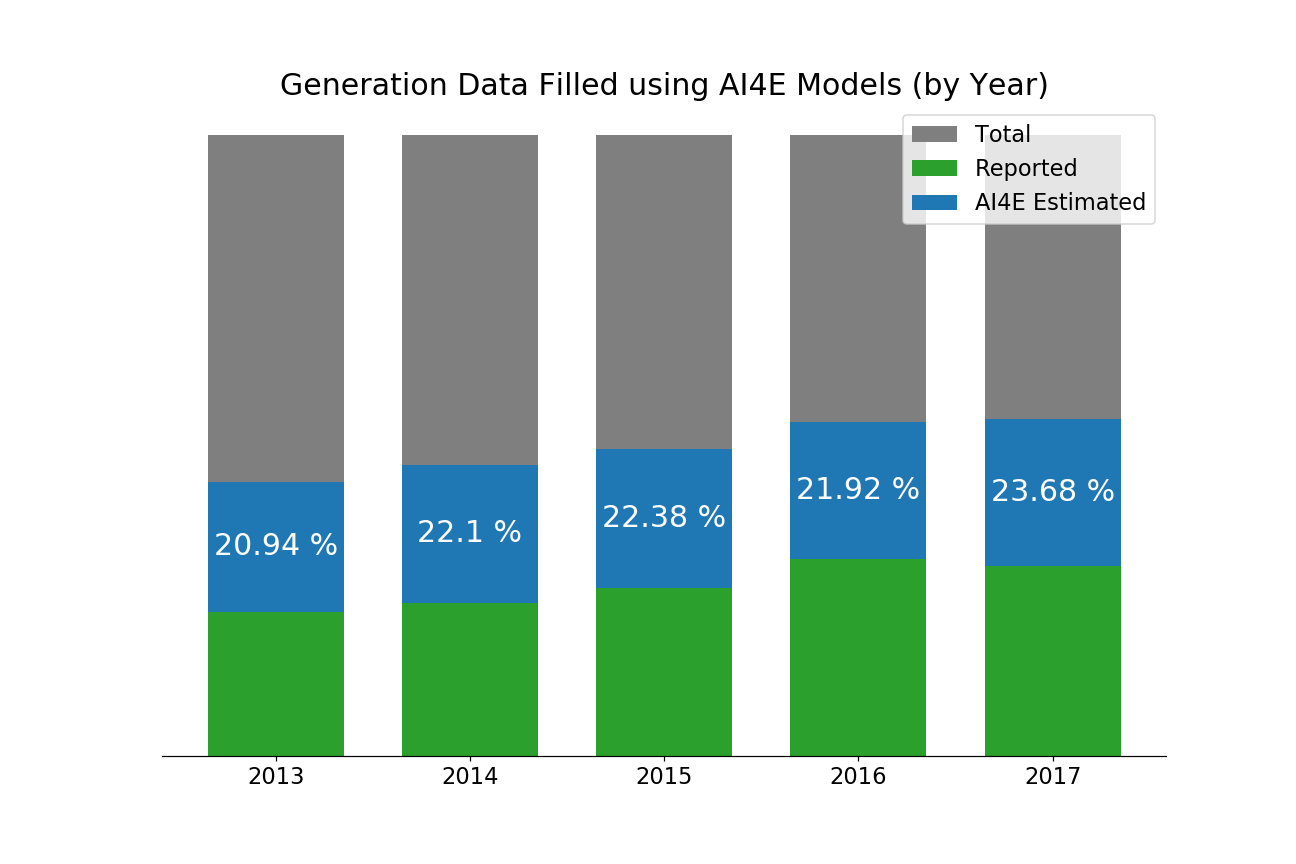

In [131]:
WIDTH = 0.7
fig,ax = plt.subplots(figsize = (12,8))
ax.bar(analysis_by_year.index,analysis_by_year['total'],width = WIDTH,color = 'tab:gray',label='Total')
ax.bar(analysis_by_year.index,analysis_by_year['reported'],width = WIDTH,color = 'tab:green',label='Reported')
ax.bar(analysis_by_year.index,analysis_by_year['ai4e_estimated'],width = WIDTH,bottom=analysis_by_year['reported'],label='AI4E Estimated')
# ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# ax.set_xlabel('Year',fontsize = 15)
# ax.set_ylabel('Year',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize = 15,loc=1)
ax.set_title('Generation Data Filled using AI4E Models (by Year)',fontsize=20)

for i in range(5):
    reported = analysis_by_year.iloc[i]['reported']
#     ax.text(i,int(reported/2),str(int(reported)),size=20,ha='center',va='center')
    estimated = analysis_by_year.iloc[i]['ai4e_estimated']
    estimated_pct = estimated / analysis_by_year.iloc[i]['total']
    ax.text(i,int(reported + estimated/2),str(round(100 * estimated_pct,2)) + ' %',size=20,ha='center',va='center',color='white')
#     remain = analysis_by_year.iloc[i]['total'] - reported - estimated
#     ax.text(i,int(reported + estimated + remain/2),str(int(remain)),size=20,ha='center',va='center',color='white')

In [67]:
FUELS = ['Wind','Solar','Hydro','Gas']
WIDTH = 0.2

fig,ax = plt.subplots(figsize = (12,8))

ax.bar(analysis_by_year.index,analysis_by_year['total'],width = WIDTH,color = 'tab:gray',label='Total')
ax.bar(analysis_by_year.index,analysis_by_year['reported'],width = WIDTH,color = 'tab:green',label='Reported')
ax.bar(analysis_by_year.index,analysis_by_year['ai4e_estimated'],width = WIDTH,bottom=analysis_by_year['reported'],label='AI4E Estimated')
# ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# ax.set_xlabel('Year',fontsize = 15)
# ax.set_ylabel('Year',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize = 15,loc=1)
ax.set_title('Generation Data Filled using AI4E Models (by Year)',fontsize=20)

# for i in range(5):
#     reported = analysis_by_year.iloc[i]['reported']
# #     ax.text(i,int(reported/2),str(int(reported)),size=20,ha='center',va='center')
#     estimated = analysis_by_year.iloc[i]['ai4e_estimated']
#     estimated_pct = estimated / analysis_by_year.iloc[i]['total']
#     ax.text(i,int(reported + estimated/2),str(round(100 * estimated_pct,2)) + ' %',size=20,ha='center',va='center',color='white')
#     remain = analysis_by_year.iloc[i]['total'] - reported - estimated
#     ax.text(i,int(reported + estimated + remain/2),str(int(remain)),size=20,ha='center',va='center',color='white')

[0, 1, 2, 3, 4]

In [254]:
break_down_by_fuel_2016 = gppd_updated[gppd_updated['primary_fuel'].isin(['Gas','Wind','Solar','Hydro'])]

In [255]:
break_down_by_fuel_2016 = break_down_by_fuel_2016.groupby('primary_fuel').agg({
    'gppd_idnr':'count',
    'generation_gwh_2016': lambda x:x.notnull().sum(),
    'ai4e_2016_incremented': 'sum'})

In [256]:
break_down_by_fuel_2016 = break_down_by_fuel_2016.reset_index()
break_down_by_fuel_2016.columns = ['Fuel','Total','Reported','AI4E Estimated']

In [257]:
break_down_by_fuel_2016['No Generation'] = break_down_by_fuel_2016['Total'] - break_down_by_fuel_2016['Reported'] - break_down_by_fuel_2016['AI4E Estimated']

In [258]:
break_down_by_fuel_2016

,Fuel,Total,Reported,AI4E Estimated,No Generation
0,Gas,3922,1952.0,273.0,1697.0
1,Hydro,7155,1982.0,5173.0,0.0
2,Solar,5929,1818.0,193.0,3918.0
3,Wind,5188,1037.0,966.0,3185.0


In [259]:
stats_cols = ['Reported','AI4E Estimated','No Generation']

In [288]:
break_down_by_fuel_2016[break_down_by_fuel_2016['Fuel']==fuel]['Total'].values[0]

5188

<IPython.core.display.Javascript object>


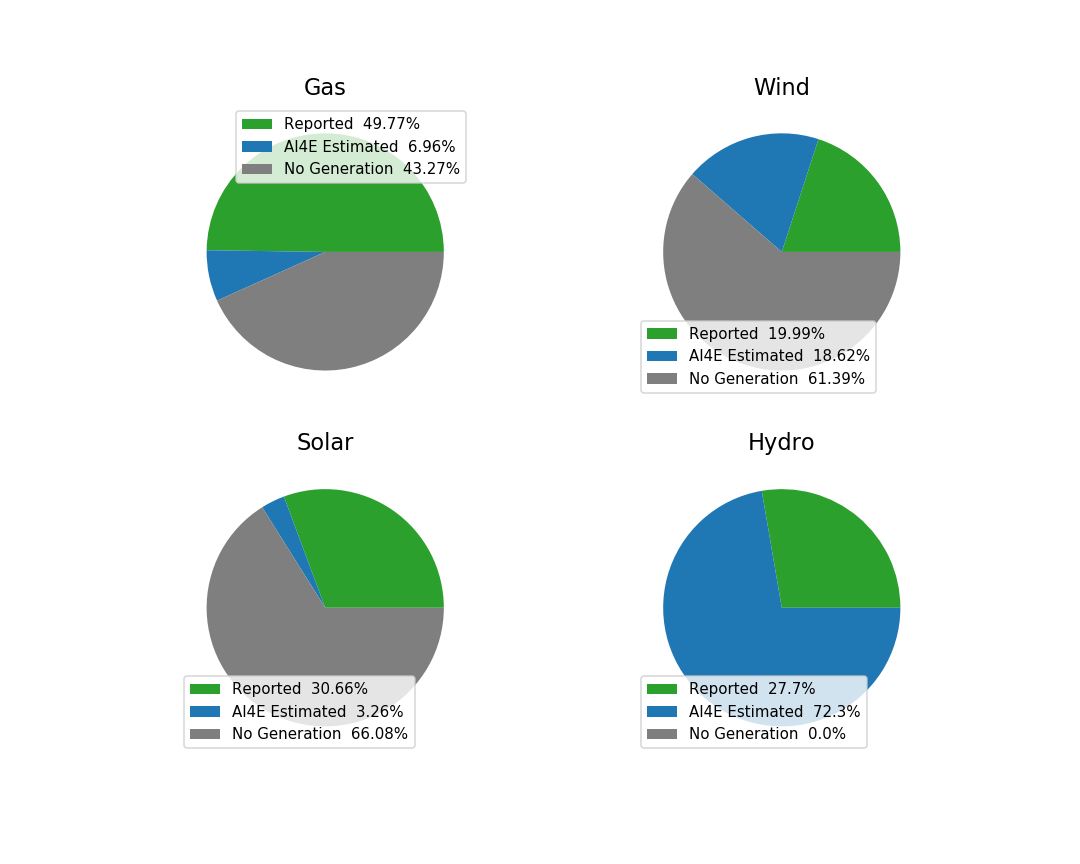

C:\Users\terry.yin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys
C:\Users\terry.yin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


In [290]:
fig,axs = plt.subplots(2,2, figsize = (10,8))
for i,fuel in enumerate(['Gas','Wind','Solar','Hydro']):
    r = i // 2
    c = i % 2
    axs[r][c].set_title(fuel, fontsize = 15)
    axs[r][c].pie(break_down_by_fuel_2016.loc[break_down_by_fuel_2016['Fuel']==fuel,stats_cols], 
                  colors = ['tab:green','tab:blue','tab:gray'])
    counts = break_down_by_fuel_2016[break_down_by_fuel_2016['Fuel']==fuel]
    labels = [t + '  ' + str(round(100 * counts[t].values[0]/counts['Total'].values[0],2)) + '%' for t in stats_cols]
    axs[r][c].legend(loc = 'bottom',labels=labels)

<IPython.core.display.Javascript object>


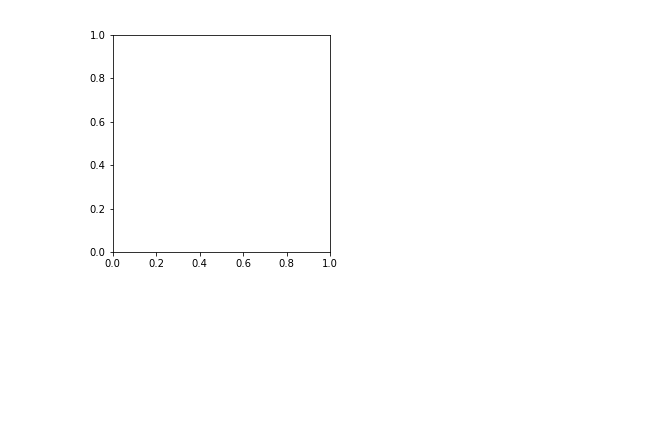

ValueError: could not convert string to float: 'Gas'

In [246]:
plt.pie(break_down_by_fuel_2016.loc[break_down_by_fuel_2016['Fuel']=='Gas'])

In [296]:
gppd_no_generation_analysis = gppd_updated[(gppd_updated['generation_gwh_2016'].isnull()) & 
                                            (gppd_updated['ai4e_estimated_generation_2016'].isnull()) & 
                                           (gppd_updated['primary_fuel'].isin(['Gas','Wind','Solar','Hydro']))]

In [297]:
cause_analysis = break_down_by_fuel_2016[['Fuel','No Generation']]

In [298]:
cause_analysis

,Fuel,No Generation
0,Gas,1697.0
1,Hydro,0.0
2,Solar,3918.0
3,Wind,3185.0


In [300]:
no_cy = gppd_no_generation_analysis.groupby('primary_fuel').agg({'commissioning_year':lambda x:x.isnull().sum()}).reset_index()

In [305]:
cause_analysis = pd.merge(cause_analysis,no_cy,'left',left_on = 'Fuel', right_on='primary_fuel').drop(['primary_fuel'],axis = 1)

In [311]:
cause_analysis

,Fuel,No Generation,commissioning_year
0,Gas,1697.0,1115.0
1,Hydro,0.0,NaN
2,Solar,3918.0,3414.0
3,Wind,3185.0,2990.0


In [328]:
gppd_no_generation_analysis[(gppd_no_generation_analysis['primary_fuel']=='Wind') & 
                            (gppd_no_generation_analysis['commissioning_year'].notnull())]['commissioning_year'].min()

2016.0

In [325]:
gppd_no_generation_analysis[(gppd_no_generation_analysis['primary_fuel']=='Gas')].shape

(1697, 36)